
# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import seaborn as sns
import numpy as np


In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

In [4]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size = int(len(data)/2)))

In [5]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [6]:
df = pd.read_csv('data/human_body_temperature.csv')

# Is the distribution of body temperatures normal?
# Although this is not a requirement for the Central Limit Theorem to hold, it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

In [7]:
len(df)

130

### Our sample size is larger than 30, according to the Central Limit Theorem the mean of all samples from the same population will be approximately equal to the mean of the population.

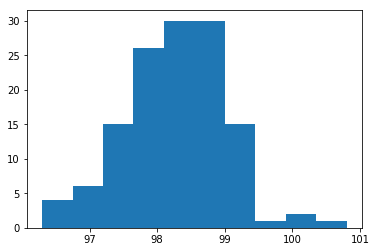

In [10]:
pyplot.hist(df['temperature'])
pyplot.show()

###  The data appears to have a normal distribution, per the above histogram.  However, the plot does not show strong normallity.

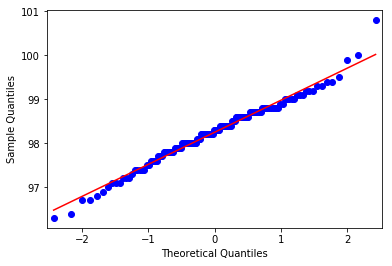

In [11]:
qqplot(df['temperature'],line='s')
pyplot.show()

### The data points from our sample, in the above qq plot, are normally distributed. This could indicate the population is normally distributed as well.

In [12]:
#Shapiro-Wilk normality test
stat, p = stats.shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


### Our p-value is not in the rejection region.  We fail to reject the null hypothesis.  (H0: Data is normally distributed)

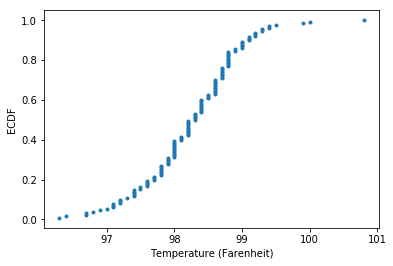

In [13]:
# Compute ecdf from temperature data
ecdf_x,ecdf_y = ecdf(df['temperature'])

# Generate plot
_ = pyplot.plot(ecdf_x, ecdf_y, marker='.', linestyle='none')

# Label the axes
_ = pyplot.xlabel('Temperature (Farenheit)')
_ = pyplot.ylabel('ECDF')

# Display the plot
pyplot.show()

### The empirical cumulative distribution function of our data reflects that of a normal distribution.

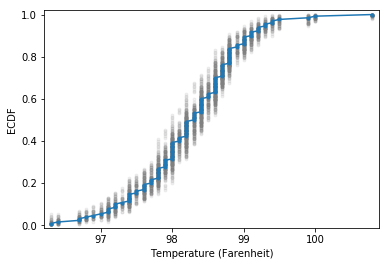

In [14]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(df['temperature'], size=len(df['temperature']))

    # Compute and plot ECDF from bootstrap sample
    x_bs, y_bs = ecdf(bs_sample)
    _ = pyplot.plot(x_bs, y_bs, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
                    
x, y = ecdf(df['temperature'])
_ = pyplot.plot(x, y, marker='.')

# Make margins and label axes
pyplot.margins(0.02)
_ = pyplot.xlabel('Temperature (Farenheit)')
_ = pyplot.ylabel('ECDF')

# Show the plot
pyplot.show()

### After conducting bootstrap samples on the data to generate bootstrap sample ECDF's, the above plot shows the bootstrap samples follow the general trend of the ECDF from the entire sample.

In [15]:
sample_mean = np.average(df['temperature'])
sample_mean

#Is the true population mean really 98.6 degrees F?
#First, try a bootstrap hypothesis test.
#Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
#In this situation, is it appropriate to use the  tt  or  zz  statistic?
#Now try using the other test. How is the result be different? Why?

98.24923076923075

In [16]:
sample_std = np.std(df['temperature'])
sample_std

0.7303577789050377

# Is the true population mean really 98.6 degrees F?
### The sample mean is approximately 98.25 degrees F, a difference of 0.35.



# H0: Mu = 98.6 , Ha: Mu =/= 98.6

# First, try a bootstrap hypothesis test


In [17]:
# Translate the sample mean, 98.25, so it matches the Null Hypothesis of 98.6
translated_temp = df['temperature']-sample_mean+98.6
np.average(translated_temp)

#Draw mean Boot-strap replicates from the translated data
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)
bs_replicates

array([98.53076923, 98.62153846, 98.54461538, ..., 98.71846154,
       98.55846154, 98.62153846])

In [18]:
p = np.sum(bs_replicates <= np.mean(df['temperature'])) / len(bs_replicates)
p

0.0

### The p-value of 0 suggests that we should reject the Null Hypothesis, H0, that the population mean is 98.6 degrees Farenheit.

# Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
###  One-sample test since we will randomly sample from the population to estimate the population mean body temperature, the two-sample test would be appropriate if we were comparing the mean body temperatures of males and females.

# In this situation, is it appropriate to use the  t  or  Z  statistic?
### A t-statistic would be appropriate for our test since we don't know the population stadard deviation. **STATS EXCHANGE**


# Now try using the other test. How is the result different? Why?
### The t statistic below is within the rejection region, giving a p-value close to 0.  So we would reject the null hypothesis, H0, that the population body temperature mean is 98.6 degrees Farenheit.  A Z statistic is the prefered method since we have a sample size of 130.  Using the sample standard deviation we receive a Z statistic that is also in the rejection region and results in a p-value close to 0, so we reject the null hypothesis.

In [19]:
t_stat = (sample_mean - 98.6)/(sample_std/(np.sqrt(len(df['temperature']))))
t_stat

-5.47592520207856

In [20]:
z_stat = (sample_mean - 98.6)/(sample_std/(np.sqrt(len(df['temperature']))))
z_stat

-5.47592520207856

In [21]:
#Draw a small sample of size 10 from the data and repeat both frequentist tests.
small_sample = np.random.choice(df['temperature'],size=10)
small_sample

array([97.2, 97.8, 98.4, 96.7, 97.9, 98.6, 98.5, 98.4, 99.9, 98.6])

In [22]:
small_sample_average = np.average(small_sample)
small_sample_std = np.std(small_sample)
small_sample_average

98.2

In [23]:
stat_small = (small_sample_average - 98.6)/(small_sample_std/(np.sqrt(len(small_sample))))
stat_small

-1.5249857033260141

# Which one is the correct one to use?
### Since the sample size is 10, we would prefer to use the t-statistic on the sample.

# What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic
### We do not reject the null hypothesis for either test statistic, however we notice that the p-value for the z-statistic is 0.911 but the p-value for the t-statistic is 0.918

# At what temperature should we consider someone's temperature to be "abnormal"?


# As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

# Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

95% confidence interval = [98.07076923 98.42615385] Degrees Farenheit
99% confidence interval = [98.01076923 98.48616154] Degrees Farenheit


C:\Users\Ronak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


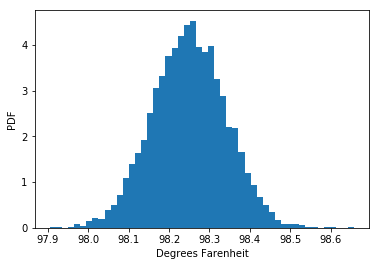

In [32]:
# Draw bootstrap replicates of the mean Body Temps.
bs_reps = draw_bs_reps(df['temperature'],np.mean,size=10000)

# Compute the 95% and 99% confidence interval: conf_int
conf_int95 = np.percentile(bs_reps,[2.5,97.5])
conf_int99 = np.percentile(bs_reps,[.5,99.5])
# Print the confidence interval
print('95% confidence interval =', conf_int95, 'Degrees Farenheit')
print('99% confidence interval =', conf_int99, 'Degrees Farenheit')
# Plot the histogram of the replicates
_ = pyplot.hist(bs_reps, bins=50, normed=True)
_ = pyplot.xlabel('Degrees Farenheit')
_ = pyplot.ylabel('PDF')

# Show the plot
pyplot.show()

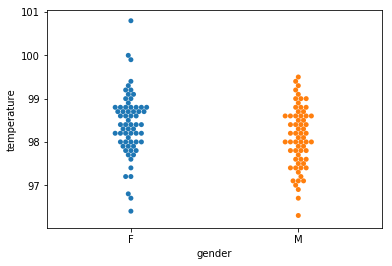

In [25]:
sns.swarmplot(x='gender',y='temperature',data=df)

### The distribution of temperatures appears to have a higher variance among Females compared to Males.

### H0: Male Body Temperature Mean = Female Body Temperature Mean
### Ha: Male Body Temperature Mean =/= Female Body Temperature Mean

In [26]:
#Seperate male frome female dataset
female_data = df[df['gender']=='F']
male_data = df[df['gender']=='M']
type(np.array(male_data['temperature']))

numpy.ndarray

In [27]:
male_sample_mean = np.average(male_data['temperature'])
female_sample_mean = np.average(female_data['temperature'])
male_sample_std = np.std(male_data['temperature'])
female_sample_std = np.std(female_data['temperature'])

print('Male Sample Mean =', male_sample_mean, 'Degrees Farenheit')
print('Female Sample Mean =', female_sample_mean, 'Degrees Farenheit')
print('Male Sample standard deviation =', male_sample_std)
print('Female Sample standard deviation =', female_sample_std)

Male Sample Mean = 98.10461538461537 Degrees Farenheit
Female Sample Mean = 98.39384615384614 Degrees Farenheit
Male Sample standard deviation = 0.6933598841828696
Female Sample standard deviation = 0.7377464486428966


In [28]:
# Compute difference of mean impact force from experiment: empirical_diff_means
diff_of_means = female_sample_mean - male_sample_mean

#Shift the mean of the two seperate arrays to both equal the full sample mean
shifted_female_data = female_data['temperature'] - female_sample_mean + sample_mean
shifted_male_data = male_data['temperature'] - male_sample_mean + sample_mean

# Generate bootstrap mean replicates and compute difference of mean:
male_bs_samples = draw_bs_reps(shifted_male_data,np.mean,size=10000)
female_bs_samples = draw_bs_reps(shifted_female_data,np.mean,size=10000)
diff_bs = female_bs_samples - male_bs_samples

# Compute and print p-value: p
p = np.sum(diff_bs>=diff_of_means) / len(diff_bs)
print('p-value =', p)

p-value = 0.0556


# Is there a significant difference between males and females in normal temperature?
### There is a slightly higher variation and mean for the female sample when compared to the male sample.

# What testing approach did you use and why?
### The bee swarm plot above visibly shows the increased variation among the female data points.

### The difference between the mean of the two samples was approximately 0.289, we first create two Temperature data sets seperated into two groups, Males and Females.  Transform both data sets to have the same mean, the mean of the entire sample (Males+Females). Using the two transformed data sets take multiple bootstrap samples from the respective data set, calculate the mean of each of the samplings. Calculate the difference of mean by taking each bootstrap mean value from the Female sample and subtracting from each mean value from the Male sample.  Calculate the p-value by finding the ratio of mean differences from our bootstrap sample that has a greater difference than the mean difference from our actual sample.  We obtain a p-value of approximately 0.053, which is close to our rejection region since we are using an alpha of 0.05, however, since the p-value is not in the rejection region, we do not reject the Null Hypothesis.  This does not negate the possiblity of the null hypothesis being incorrect that the two have the same mean.

# Write a story with your conclusion in the context of the original problem.
### We found that the temperature data is normally distributed, the sample size is large (130).  The data was a random sampling so the body temperatures of the participants is independent.
### According to the hypothesis tests performed on the sample data, we find a significant p-value, which results in a rejection of the null hypothesis.  The hypothesis tests indicate the true population mean of 98.6 should be re-evaluated.
### There is also a noticeable difference in variation and mean between body temperatures between males and females.  However, there was not sufficient evidence to reject the null hypothesis that the two genders have the same mean.